# **Relatório 04 - Interpolação Polinomial e Splines**
##### **Gabriel van Loon Bodê da Costa Dourado Fuentes Rojas**
##### **SME0104 - Cálculo Numérico**
##### **Docente: Cynthia de Oliveira Lage Ferreira** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# **Resumo do Relatório**

Neste relatório iremos revisar a teoria e prática acerca dos métodos de interpolação polinomial vistos em sala, além de introduzirmos a técnica de interpolação utilizando Splines Lineares e Cúbicos.

No fim, aplicamos as técnicas de splines para gerar gráficos de dados referentes ao fechamento da Bolsa de Valores IBOVESPA durante o mês de julho/2020 e comparamos os resultados obtidos ao usar a interpolação linear e a cúbica.

# **Interpolação Polinomial**

Dado um conjunto de $(n+1)$ pontos $(x_i,y_i)$ tal que $f(x_i) = y_i$, com $f$ conhecida ou não. Queremos encontrar uma **função interpoladora** $F(x) \in P_n$ tal que, $\forall i = 0...n$, $F(x_i) = y_i = f(x_i)$. 

Sabemos que $F(x)$ pode ser expressa como uma combinação linear dos polimômios da base canônica de $P_n$, iremos então gerar o seguinte sistema:

\begin{cases}
F(x_0) = a_0 + a_1x_0 + a_2x_0^2 + ... + a_nx_0^n = y_0 \\
F(x_1) = a_1 + a_1x_1 + a_2x_1^2 + ... + a_nx_1^n = y_1 \\
... \\
F(x_n) = a_n + a_1x_n + a_2x_n^2 + ... + a_nx_n^n = y_n 
\end{cases}

Podemos escrever o sistema acima com uma forma matricial do tipo $Ax = b$ tal que

\begin{equation}
\begin{pmatrix}
1 & x_0 & ... & x_0^n \\
1 & x_1 & ... & x_1^n \\
\vdots & \vdots & \ddots & \vdots\\
1 & x_n & ... & x_n^n \\
\end{pmatrix}
.
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{pmatrix}
=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{pmatrix}
\end{equation}

A matriz $A$ é também conhecida como **Matriz de Vandermond** e tem a propriedade de que $det(x) = \prod_{i<k}(x_k - x_i)$. Logo, quanto tivermos todos os $x_i$ no conjunto de dados distintos é garantido que o sistema terá solução e ela será única. 

Podemos aplicar algum tipo de método direto ou iterativo para resolver o sistema acima, porém precisamos lembrar que caso $n$ seja muito grande tais métodos podem ser bastante custosos e, por isso mesmo, iremos ver outras formas de gerar a $F(x)$ sem a necessidade de resolver o sistema acima.

In [ ]:
def get_y_by_coefs(x,coefs):
  y = np.zeros((1,len(x))).flatten()
  n = len(coefs)
  for i in range(0, len(coefs)):
    y += coefs[i] * (x **(n-i-1)) 
  return y

def interpolacao_sistema(x,y):
  A = np.vander(x)
  coefs = np.linalg.solve(A,y)
  return coefs

interpolando $f(x) = 5x^6 - 4.5x^4 - 3x^3 + 22x^2 + 13x + 300$ com $7$ pontos entre $[-1,1]$

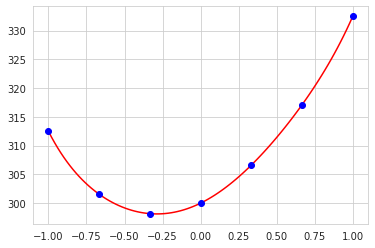

In [ ]:
f = lambda x: 5*x**6 - 4.5*x**4 - 3*x**3 + 22*x**2 + 13*x + 300
x = np.linspace(-1,1,7)
y = np.vectorize(f)(x)

coefs  = interpolacao_sistema(x,y)
x_pred = np.linspace(-1,1,100)
y_pred = get_y_by_coefs(x_pred,coefs)

plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo')

interpolando $f(x) = e^{x^2} \cos(x)$ com $15$ pontos entre $[9,10]$

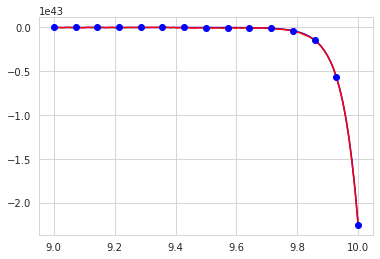

In [ ]:
f = lambda x: math.exp(x**2)*math.cos(x)
x = np.linspace(9,10,15)
y = np.vectorize(f)(x)

coefs  = interpolacao_sistema(x,y)
x_pred = np.linspace(9,10,100)
y_pred = get_y_by_coefs(x_pred,coefs)

x_exp = np.linspace(9,10,100)
y_exp = np.vectorize(f)(x_exp)

plt.plot(x_exp,y_exp, 'b')
plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo')

interpolando $f(x) = \dfrac{1}{(1+25x^2)}$ com $15$ pontos entre $[-1,1]$

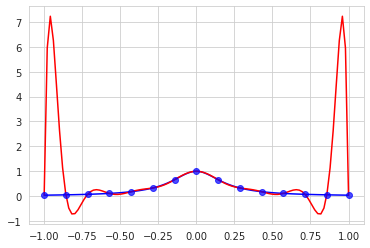

In [ ]:
f = lambda x: 1/(1 + 25*x**2)
x = np.linspace(-1,1,15)
y = np.vectorize(f)(x)

coefs  = interpolacao_sistema(x,y)
x_pred = np.linspace(-1,1,100)
y_pred = get_y_by_coefs(x_pred,coefs)

x_exp = np.linspace(-1,1,100)
y_exp = np.vectorize(f)(x_exp)

plt.plot(x_exp,y_exp, 'b')
plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo', alpha=0.7)

# **Interpolação de Lagrange**

Muito próximo do que foi visto na sessão anterior, Lagrange também define sua $F(x)$ como uma soma de $n+1$ polinômios $\ell_k(x)$. Eles no entanto não serão elementos da base canônica e possuem como coeficientes os próprios $y_k$, gerando um sistema abaixo:

\begin{cases}
P_n(x_0) = y_0 \ell_0(x_0) + y_1 \ell_1(x_0) + ... + y_n \ell_n(x_0) = y_0 \\
P_n(x_1) = y_0 \ell_0(x_1) + y_1 \ell_1(x_1) + ... + y_n \ell_n(x_1) = y_1 \\
\vdots  \\
P_n(x_n) = y_0 \ell_0(x_n) + y_1 \ell_1(x_n) + ... + y_n \ell_n(x_n) = y_n 
\end{cases}

Neste caso, não queremos mais determinar os coeficientes, uma vez que eles serão os próprios $y_i$, mas sim os polinômios que irão tornar o sistema verdadeiro. Para cada $l_k(x_i)$ precisamos que:

\begin{equation}
l_k(x_i) = 
\begin{cases}
1, \space se \space i=k \\
0, \space se \space i \neq k
\end{cases}
\end{equation}

Isso equivale à dizer que precisamos que $l_k(x)$ tenha como raíz todos os $x_j \neq x_i$. Sabemos que podemos escrever um polinômio ao conhecer suas raízes por meio da seguinte forma:

\begin{equation}
l_k(x) = a(x - x_0)(x - x_1)...(x - x_n) = a \prod_{j \neq i}^n(x - x_j) \space,\space a \in \mathbb{R}
\end{equation}

Substituindo a forma acima em $P_n(x)$ teremos o resultado acima, mas ainda precisamos encontrar o valor do coeficiente $a \in \mathbb{R}$. Teremos que

\begin{equation}
P_n(x_i) = y_i \ell_i(x_i) = y_i a \prod_{j \neq i}^n(x_i - x_j) = y_i \\
\Rightarrow a = \dfrac{y_i}{y_i \prod_{j \neq i}^n(x_i - x_j)} = \dfrac{1}{\prod_{j \neq i}^n(x_i - x_j)} 
\end{equation}

com isso determinamos cada $l_k(x)$ será dado por $l_k(x) = \prod_{j \neq k}^n \dfrac{(x - x_j)}{(x_k - x_j)}$


In [ ]:
def interpolacao_lagrange(xi, yi, x):
  L = np.ones((len(xi),len(x)))

  for i in range(0,len(xi)):
    for j in range(0, len(xi)):
      if (i != j):
        L[i,:] = L[i,:] * ( (x - xi[j]) / (xi[i] - xi[j]) )
    L[i,:] =  L[i,:] * y[i]

  return np.sum(L,axis=0)

interpolando $f(x) = 5x^6 - 4.5x^4 - 3x^3 + 22x^2 + 13x + 300$ com $10$ pontos entre $[-1,1]$

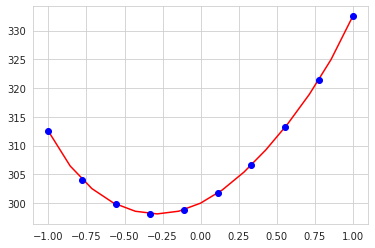

In [ ]:
f = lambda x: 5*x**6 - 4.5*x**4 - 3*x**3 + 22*x**2 + 13*x + 300
x = np.linspace(-1,1,10)
y = np.vectorize(f)(x)
x_pred = np.linspace(-1,1,15)

y_pred = interpolacao_lagrange(x,y,x_pred)

plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo')

interpolando $f(x) = e^{x^2}$ com $25$ pontos entre $[8,9]$

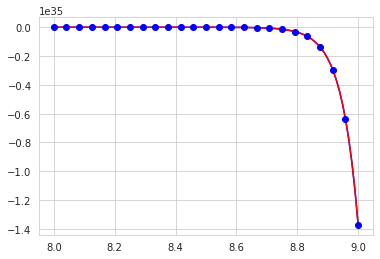

In [ ]:
f = lambda x: math.exp(x**2)*math.cos(x)
x = np.linspace(8,9,25)
y = np.vectorize(f)(x)
x_pred = np.linspace(8,9,100)

y_pred = interpolacao_lagrange(x,y,x_pred)

x_exp = np.linspace(8,9,100)
y_exp = np.vectorize(f)(x_exp)

plt.plot(x_exp,y_exp, 'b')
plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo')

interpolando $f(x) = \dfrac{1}{(1+25x^2)}$ com $15$ pontos entre $[-1,1]$

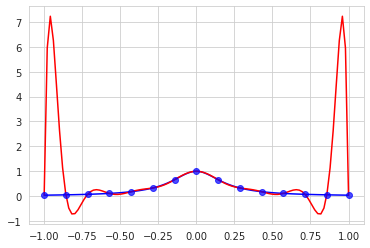

In [ ]:
f = lambda x: 1/(1 + 25*x**2)
x = np.linspace(-1,1,15)
y = np.vectorize(f)(x)
x_pred = np.linspace(-1,1,100)
y_pred = interpolacao_lagrange(x,y,x_pred)

x_exp = np.linspace(-1,1,100)
y_exp = np.vectorize(f)(x_exp)

plt.plot(x_exp,y_exp, 'b')
plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo', alpha=0.7)

Uma das desvantagems do método de Lagrange é a necessidade de recalcular todos os $l_k(x)$ toda vez que há uma mudança no conjunto de dados. Veremos agora um outro método que permite que novos pontos sejam adicionados sem que haja um custo muito elevado para refazer a interpolação.

# **Formas de Newton**

Nas Formas de Newton, o polinômio interpolador $P_n(x)$ também é uma combinação de polinômios dados da seguinte forma:

\begin{equation}
P_n(x) = \alpha_0 + \alpha_1(x - x_0) + \alpha_2(x - x_0)(x - x_1) + ... + \alpha_n \prod_{i=0}^{n-1}(x - x_i)
\end{equation}

Veja que, ao contrário de Lagrange, cada polinômio associado aos $\alpha_i$, que irei chamar de $n_i(x)$ apenas para simplificar, garante que $n_i(x_j) = 0$ se e somente se $j < i$. Logo, para garantir que $\alpha_in_i(x_i) = y_i$ será necessário compensar a influência dos polinômios anteriores, uma vez que eles não serão nulos nesses pontos.

$\square$ Dado apenas um ponto ($n_{max} = 0$).

$P_n(x_0) = \alpha_0 = y_0$, logo $\alpha_0 = y_0$

$\square$ Dado dois pontos ($n_{max} = 1$).

$P_n(x_1) = \alpha_0 + \alpha_1(x_1 - x_0) = y_1$

Já temos que $\alpha_0 = y_0$, logo $\alpha_1 = \dfrac{(y_1 - y_0)}{x_1 - x_0}$

$\vdots$

$\square$ Dado $k$ pontos ($n_{max} = k$).

Teremos então que $\alpha_k = f[x_0,x_1,...,x_k]$ em que:

\begin{equation}
f[x_i, x_{i+1},...,x_{i+k}] = \dfrac{f[x_{i+1},...,x_{i+k}] - f[x_i, x_{i+1},...,x_{i+k-1}]}{x_{i+k} - x_i}
\end{equation}

São chamadas **Diferenças Divididas** e permitem o cálculo dos coeficientes por meio de uma recursão. Abaixo temos uma implementação do método de newton similar ao que foi feito com o método de Lagrange.

In [ ]:
def interpolacao_newtow(xi, yi, x):
  n = len(xi)
  F = np.zeros((n,n))
  P = np.ones((n,len(x)))

  # Calculando a tabela de diferenças divididas
  F[:,0] = yi.T
  for j in range(1,n):
    for i in range(0,n-j):
      F[i,j] = (F[i+1,j-1] - F[i,j-1]) / (xi[i+j] - xi[i])

  # Calculando o produtório para os x de entrada
  for i in range(1, n):
    P[i,:] = P[i-1,:] * (x - xi[i-1])

  # Multiplicando os Alphas de F com os produtórios
  for i in range(0, n):
    P[i,:] = P[i,:] * F[0,i]

  print(F[0,:])

  return np.sum(P, axis=0)

interpolando $f(x) = 5x^6 - 4.5x^4 - 3x^3 + 22x^2 + 13x + 300$ com $10$ pontos entre $[-1,1]$

[ 3.12500000e+02 -3.79387627e+01  4.21434233e+01 -2.30987654e+01
  1.98827160e+01 -1.33333333e+01  5.00000000e+00 -3.19344551e-12
  2.64709683e-12 -1.01153015e-12]


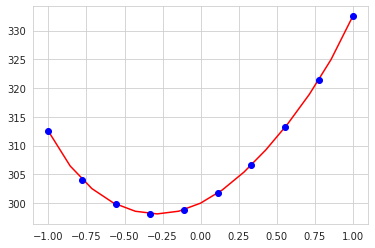

In [ ]:
f = lambda x: 5*x**6 - 4.5*x**4 - 3*x**3 + 22*x**2 + 13*x + 300
x = np.linspace(-1,1,10)
y = np.vectorize(f)(x)
x_pred = np.linspace(-1,1,15)

y_pred = interpolacao_newtow(x,y,x_pred)

plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo')

interpolando $f(x) = \dfrac{1}{(1+25x^2)}$ com $15$ pontos entre $[-1,1]$

[ 3.84615385e-02  9.22023182e-02  1.93433350e-01  4.26970349e-01
  1.04409790e+00  2.62112068e+00  1.31173561e+00 -6.08432470e+01
  1.22171515e+02  6.97512230e+01 -7.68950459e+02  1.90761484e+03
 -3.06013214e+03  3.74491696e+03 -3.74491696e+03]


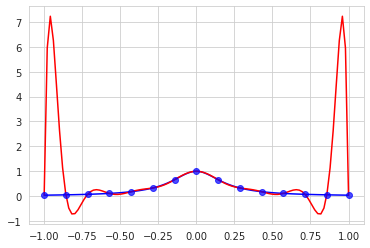

In [ ]:
f = lambda x: 1/(1 + 25*x**2)
x = np.linspace(-1,1,15)
y = np.vectorize(f)(x)
x_pred = np.linspace(-1,1,100)
y_pred = interpolacao_newtow(x,y,x_pred)

x_exp = np.linspace(-1,1,100)
y_exp = np.vectorize(f)(x_exp)

plt.plot(x_exp,y_exp, 'b')
plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo', alpha=0.7)

Dado um conjunto $X$ de $(n+1)$ pontos $(x_i,f(x_i))$, vimos até agora diversas técnicas que visavam encontrar um único polinômio $P_n(x)$ que tornasse verdade a igualdade $P_n(x_i) = f(x_i)$, $\forall i \in [0,n]$.

O resultado obtido pelas práticas anteriores foram, de certa forma, equivalentes e sofriam, em alguns casos, de um problema conhecido como **Fenômeno de Runge** e que ocorre devido ao fato de estarmos utilizando polinômios como grau $n$ muito elevado (o fenômeno fica visível quando $f(x) = 1/(1+25x^2)$). 

Uma outra alternativa existente, e que veremos a seguir, é a de fazer uma interpolação por segmentos. Dessa forma, separamos $X$ em grupos e aplicamos uma interpolação polinomial de grau $m$ em cada um dos segmentos.

Essa aproximação, no entanto, não pode ser feita sem algumas restrições, umas vez que é necessário garantir que a junção de diferentes segmentos $X_i$ e $X_{i+1}$ seja feita de maneira suave.

# **Splines de Interpolação**

Splines são tipos especiais de funções definidas por partes, cujas partes são polinômios de mesmo grau e que são geradas por meios de um conjunto de *nós* ou *pontos de controle* $(x_i,y_i)$.


## **Splines Lineares**

Seja um conjunto $X$ com $n+1$ nós, um spline linear irá conter $n$ segmentos $S_{1,i}(x) \in P_1$ com as seguintes restrições

\begin{equation}
\begin{cases}
S_{1,i}(x)   = a_0 + a_1x \\
S_{1,i}(x_i) = a_0 + a_1x_i = y_i \\
 S_{1,i}(x_{i+1}) = a_0 + a_1x_{i+1} = y_{i+1} \\
\end{cases}
\Rightarrow
\begin{cases}
a_0 = y_i - a_1x_i \\
a_1 = \dfrac{(y_{i+1} - y_i)}{(x_{i+1} - x_i)}
\end{cases}
\Rightarrow
S_{1,i}(x) = y_i\dfrac{x_{i+1} - x}{x_{i+1} - x_{i}} + y_{i+1}\dfrac{x - x_i}{x_{i+1} - x_{i}}
\end{equation}

Os Splines lineares são bastante simples de serem calculados pois, por se tratar de aproximações lineares, não possuem nenhuma restrição de suavidade. A seguir temos a implementação dos splines lineares e algumas implementações de exemplo.

In [ ]:
def get_y_spline_linear(segs, x):
  i = 0
  y = []
  for k in range(0, len(x)):
    while (i < len(segs)-1) and (x[k] > segs[i]['x_max']):
      i += 1
    c = segs[i]['coefs']
    y.append( c[0]*x[k] + c[1] )
  return np.array(y)

def spline_linear(xi,yi):
  n    = len(xi)-1
  segs = []

  for i in range(0,n):
    a1 = (yi[i+1] - yi[i])/(xi[i+1] - xi[i])
    a0 = yi[i] - a1*xi[i]
    segs.append({
        'x_min': xi[i],
        'x_max': xi[i+1],
        'coefs': [a1,a0],
    })
  return segs

Spline de $f(x) = \dfrac{cos(x)}{x}$ com $5$, $10$ e $20$ nós entre $[1,10]$

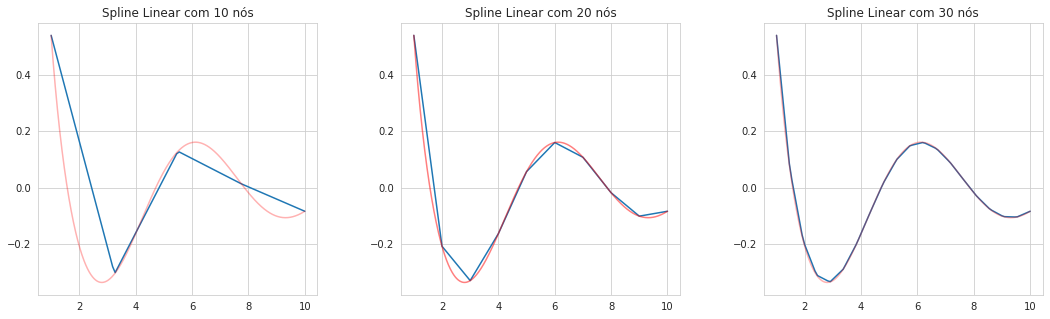

In [ ]:
f = lambda x: math.cos(x)/x

# Fazendo spline com 10 nós
x = np.linspace(1,10,5)
y = np.vectorize(f)(x)
segs = spline_linear(x,y)
x_pred1 = np.linspace(1,10,100)
y_pred1 = get_y_spline_linear(segs,x_pred1)

# Fazendo Spline com 20 nós
x = np.linspace(1,10,10)
y = np.vectorize(f)(x)
segs = spline_linear(x,y)
x_pred2 = np.linspace(1,10,100)
y_pred2 = get_y_spline_linear(segs,x_pred2)

# Fazendo Spline com 30 nós
x = np.linspace(1,10,20)
y = np.vectorize(f)(x)
segs = spline_linear(x,y)
x_pred3 = np.linspace(1,10,100)
y_pred3 = get_y_spline_linear(segs,x_pred3)

# Calculando os resultados originais esperados
x_original = np.linspace(1,10,1000)
y_original = np.vectorize(f)(x_original)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(x_pred1, y_pred1)
ax1.plot(x_original, y_original, 'r', alpha=0.3)
ax1.set_title("Spline Linear com 5 nós")

ax2.plot(x_pred2, y_pred2)
ax2.plot(x_original, y_original, 'r', alpha=0.5)
ax2.set_title("Spline Linear com 10 nós")

ax3.plot(x_pred3, y_pred3)
ax3.plot(x_original, y_original, 'r', alpha=0.3)
ax3.set_title("Spline Linear com 20 nós")

plt.show()

Como podemos ver, aproximar uma função $cos(x)/x$ no intervalo $[1,10]$ com algo em torno de $20$ nós já à torna visualmente próxima da reta original. Vamos ver se com um número de nós próximo à 20 conseguimos nos aproximar melhor da $f(x) = 1/(1+25x^2)$

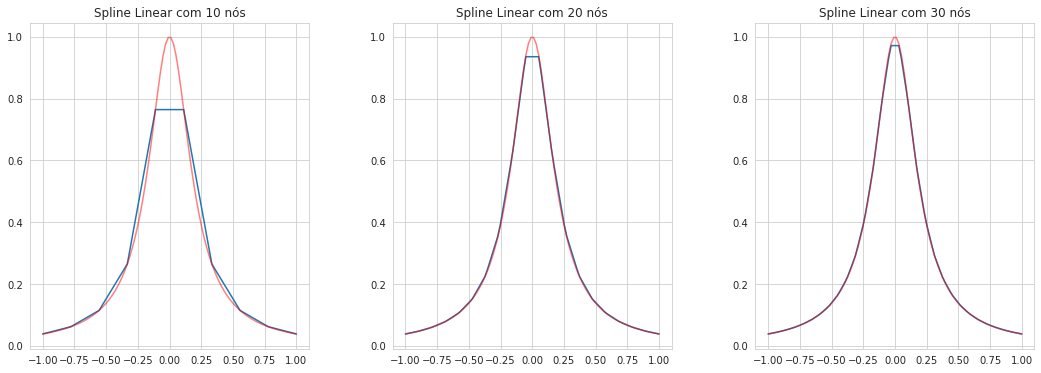

In [ ]:
f = lambda x: 1/(1 + 25*x**2)

x_original = np.linspace(-1,1,100)
y_original = np.vectorize(f)(x_exp)


# Testando com 10 Nós
x = np.linspace(-1,1,10)
y = np.vectorize(f)(x)
segs = spline_linear(x,y)
x_pred1 = np.linspace(-1,1,100)
y_pred1 = get_y_spline_linear(segs,x_pred1)

# Testando com 20 Nós
x = np.linspace(-1,1,20)
y = np.vectorize(f)(x)
segs = spline_linear(x,y)
x_pred2 = np.linspace(-1,1,100)
y_pred2 = get_y_spline_linear(segs,x_pred2)

# Testando com 30 Nós
x = np.linspace(-1,1,30)
y = np.vectorize(f)(x)
segs = spline_linear(x,y)
x_pred3 = np.linspace(-1,1,100)
y_pred3 = get_y_spline_linear(segs,x_pred3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(x_pred1, y_pred1)
ax1.plot(x_original, y_original, 'r', alpha=0.5)
ax1.set_title("Spline Linear com 10 nós")

ax2.plot(x_pred2, y_pred2)
ax2.plot(x_original, y_original, 'r', alpha=0.5)
ax2.set_title("Spline Linear com 20 nós")

ax3.plot(x_pred3, y_pred3)
ax3.plot(x_original, y_original, 'r', alpha=0.5)
ax3.set_title("Spline Linear com 30 nós")

plt.show()

Como podemos ver, a interpolação por partes consegue uma boa aproximação dada uma quantidade de nós, nos livrando da necessidade de encontrar um polinômio de grau muito alto e que sofra do Fenômeno de Runge.

Uma outra boa aplicação para os splines lineares é o de permitir a criação de gráficos cujos dados não necessáriamente vieram de alguma função matemática mas sim de algum tipo de coleta de informações.

O gráfico abaixo, por exemplo, foram retirados dos valores da Bolsa de Valores Ibovespa e representam o valor em que a mesma fechou do dia 1 de julho até o dia 30 de julho (Obs: apenas dias úteis, logo são 22 dados no total).

Vamos dar uma olhada no formato dos dados a seguir:

In [ ]:
dados_bovespa = pd.read_csv('/content/Dados Ibovespa Julho.csv')
dados_bovespa.head(5)

,Data,Fechamento
0,30 de jul. de 2020,"105.008,70"
1,29 de jul. de 2020,"105.605,00"
2,28 de jul. de 2020,"104.109,00"
3,27 de jul. de 2020,"104.477,00"
4,24 de jul. de 2020,"102.382,00"


Vamos primeiro converter o DataFrame em uma lista do python, fazendo os devidos tratamentos para converter os dados em `floats` e reverter a lista, uma vez que o primeiro dado atualmente representa o último dia do mês.

In [ ]:
y = list(dados_bovespa['Fechamento'])
y.reverse()
for i in range(0,len(y)):
  y[i] = float(y[i].replace('.','').replace(',','.'))
x = np.linspace(1, len(y), len(y))

Por fim, vamos plotar o gráfico e, como já sabiamos, os pontos não apresentam nenhum tipo de padrão mas o Spline linear nos ajuda à ter uma ideia de como eles variaram durante o mês.



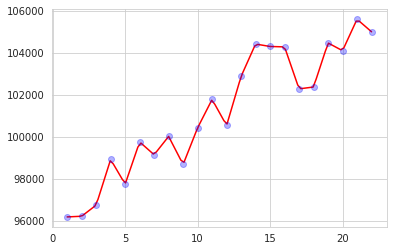

In [ ]:
segs = spline_linear(x,y)
x_pred = np.linspace(1,len(y),100)
y_pred = get_y_spline_linear(segs,x_pred)

plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo', alpha=0.3)

Por fim, splines lineares são muito utilizados para criação de gráficos ou outras finalidades, mas agora iremos ver outra categoria de splines que também é muito interessante.

# **Splines Cúbicas**

Similar ao que vimos anteriormente, dessa vez queremos que as partes de nossa spline seja composta por polinômios de 3º grau da seguinte forma:

\begin{array}
\mbox{0)} & S_{3,i}(x) = a_i(x-x_i)^3 + b_i(x-x_i)^2 + c_i(x-x_i) + d_i \\
\mbox{1)} & S_{3,i}(x_i) = y_i \\
\mbox{2)} & S_{3,i}(x_{i+1}) = S_{i+1}(x_{i+1}) =  y_{i+1}  
\end{array}

Porém, apenas com as condições acima apenas garantimos que as partes vizinhas se encontrarão nas extremidades, mas não que elas serão continuas de maneira suave. Para que isso ocorra devidamente devemos também garantir as seguintes condições:

\begin{array}
\mbox{3)} & S'_{3,i}(x_{i+1}) = S'_{i+1}(x_{i+1}) \\
\mbox{4)} & S''_{3,i}(x_{i+1}) = S''_{3,i+1}(x_{i+1}) \\
\mbox{5.a)} & S'''_{3,0}(x_0) = S'''_{3,n}(x_n) = 0 \\ 
\mbox{5.b)} & S'_{3,0}(x_0) = f'(x_0) \mbox{ e } S'_{3,n}(x_n) = f'(x_n) \\ 
\end{array}

Logo, como há $n$ segmentos, haverá $4n$ incógnitas para serem encontradas no total.


$\square$ pela **condição 1** é simples ver que $d_i = y_i$.

$\square$ Derivando a $S_{3,i}(x)$ teremos que

$S_{3,i}(x) = a_i(x-x_i)^3 + b_i(x-x_i)^2 + c_i(x-x_i) + y_i \\
 S'_{3,i}(x) = 3a_i(x-x_i)^2 + 2b_i(x-x_i) + c_i \\
 S''_{3,i}(x) = 6a_i(x-x_i) + 2b_i$

Isolando $b_i$ na última fórmula e chamando $S''_{3,i}(x_i) = z_i$, teremos 

$S''_{3,i}(x_i) = 6a_i(x_i - x_i) + 2b_i \Rightarrow  b_i = \dfrac{z_i}{2}$

$\square$ Tomando a distância de um segmento como $h_i = x_{i+1} - x_i$, teremos pela **condição 4** que:

$S''_{3,i}(x_{i+1}) = S''_{3,i+1}(x_{i+1}) \\
\Rightarrow 6a_i(x_{i+1}-x_i) + 2b_i = 6a_{i+1}(x_{i+1}-x_{i+1}) + 2b_{i+1} \\
\Rightarrow 6a_i(x_{i+1}-x_i) + 2b_i = 0 + 2b_{i+1} \\
\Rightarrow 6a_ih_i + 2b_i = 2b_{i+1} \\ 
\Rightarrow a_i = \dfrac{2(b_{i+1} - b_i)}{6h_i} = \dfrac{(z_{i+1} -z_i)}{6h_i}$

$\square$ Pela **condição 2** teremos que

$S_{3,i}(x_{i+1}) = S_{i+1}(x_{i+1}) \\
\Rightarrow a_i(x-x_i)^3 + b_i(x-x_i)^2 + c_i(x-x_i) + y_i = y_{i+1}
\Rightarrow \dfrac{(z_{i+1} -z_i)}{6h_i}(x_{i+1}-x_i)^3 
+ \dfrac{z_i}{2}(x_{i+1}-x_i)^2 
+ c_i(x_{i+1}-x_i) + y_i = y_{i+1} \\
\Rightarrow \dfrac{(z_{i+1} -z_i)}{6h_i}h_i^3 
+ \dfrac{z_i}{2}h_i^2 
+ c_ih_i + y_i = y_{i+1}$

Isolando $c_i$ na equação acima teremos que

$c_i = \dfrac{y_{i+1} - y_i}{h_i} - \dfrac{z_{i+1}h_i}{6} - \dfrac{z_ih_i}{3}$

$\square$ Por fim, pela **condição 3** teremos que

$S'_{3,i}(x_{i+1}) = S'_{i+1}(x_{i+1}) \\
\Rightarrow 3a_i(x_{i+1}-x_i)^2 + 2b_i(x_{i+1}-x_i) + c_i = c_{i+1} \\
\Rightarrow 3a_ih^2 + 2b_ih + c_i = c_{i+1} \\ 
\Rightarrow 3\dfrac{(z_{i+1} -z_i)}{6h_i}h^2 + 2\dfrac{z_i}{2}h + c_i = c_{i+1} \\
\Rightarrow 3\dfrac{(z_{i+1} -z_i)}{6h_i}h^2 + 2\dfrac{z_i}{2}h + \dfrac{y_{i+1} - y_i}{h_i} - \dfrac{z_{i+1}h_i}{6} - \dfrac{z_ih_i}{3} 
= \dfrac{y_{i+2} - y_{i+1}}{h_{i+1}} - \dfrac{z_{i+2}h_{i+1}}{6} - \dfrac{z_{i+1}h_{i+1}}{3} \\
$

Ajustando os indices para corresponderem à $c_{i-1}$ e $c_i$ e isolando $z$'s teremos então a equação final dada por

\begin{equation}
z_{i-1}h_{i-1} + z_i(2h_{i-1} + 2h_i) + z_{i+1}h_i 
= \dfrac{6(y_{i+1} - y_i)}{h_i} - \dfrac{6(y_i - y_{i+1})}{h_{i-1}} = (*)
\end{equation}

Logo, resolvendo os valores de $z_i$ na equação acima conseguimos encontrar todos os coeficientes $a_i$, $b_i$, $c_i$ e $d_i$. Além disso, podemos ver que a equação acima possui tanto $z_i$ do segmento atual quanto dos segmentos vizinhos, e isso provêm do fato de que queremos garantir que os polinômios vizinhos tenham conhexões suaves.

## **Condições de Contorno**

Como já vimos, iremos resolver um sistema linear para encontrar os valores dos $z_i$. No entanto, primeiro é preciso definir os valores de $z_0$ e $z_n$ pois o primeiro e o último segmento precisam desses valores para serem construidos.

A **condição 5.a** é chamada de **Contorno Natural**, em que consideramos $S'''_{3,0}(x_0) = S'''_{3,n}(x_n) = 0$ e isso irá acarretar em $z_0 = z_n = 0$.

Já a condição **5.b** é chamada de **Condições de Contorno Fixadas** e é útil para quando conhecemos a **f(x)** que gerou os nós e queremos a interpolação se mantenha fiel à função original em suas extremidades. Para isso usamos $S'_{3,0}(x_0) = f'(x_0) \mbox{ e } S'_{3,n}(x_n) = f'(x_n)$ que irá fazer com que o primeiro e o ultimo sistema de sejam, respectivamente:

$ z_02h_0 + z_1h_0 = 6(\dfrac{(y_1 - y_0)}{h_0} - f'(x_0)) $

$ z_{n-1}2h_{n-1} + z_nh_{n-1} = 6(f'(x_n) - \dfrac{(y_n - y_{n-1})}{h_{n-1}}) $


# **Spline Cúbica Natural**

A seguir exibimos algumas substituições utilizadas para deixar a equação $(*)$ mas legível e em seguida montamos a forma matricial para a resolução das incógnitas $z_i$.

Seja $u_i = 2(h_i + h_{i-1})$, $w_i = \dfrac{6}{h_i}(y_{i+1} - y_i)$ e  $v_i = w_i - w_{i-1}$. Temos então que:

\begin{equation}
z_{i-1}h_{i-1} + z_i(2h_{i-1} + 2h_i) + z_{i+1}h_i 
= \dfrac{6(y_{i+1} - y_i)}{h_i} - \dfrac{6(y_i - y_{i+1})}{h_{i-1}}\\
\Rightarrow z_{i-1}h_{i-1} + z_iu_i + z_{i+1}h_i = w_i - w_{i-1} \\
\Rightarrow z_{i-1}h_{i-1} + z_iu_i + z_{i+1}h_i = v_i
\end{equation}

Gerando o seguinte sistema
\begin{equation}
\begin{pmatrix}
u_1 & h_1 \\
h_1 & u_2 & h_2 \\
    & \vdots & \vdots & \vdots \\
    &     & h_{n-3} & u_{n-2} & h_{n-2} \\
    &     &         & h_{n-2} & u_{n-1}  \\
\end{pmatrix}
. 
\begin{pmatrix}
z_1 \\
z_1 \\
\vdots \\
z_{n-2} \\
z_{n-1} \\
\end{pmatrix}
=
\begin{pmatrix}
v_1 \\
v_1 \\
\vdots \\
v_{n-2} \\
v_{n-1} \\
\end{pmatrix}
\end{equation}

Por fim, abaixo temos uma implementação das Splines Cúbicas.

In [ ]:
def get_y_spline_cubica(segs, x):
  i = 0
  y = []
  for k in range(0, len(x)):
    while (i < len(segs)-1) and (x[k] > segs[i]['x_max']):
      i += 1
    xi = segs[i]['x_min']
    c  = segs[i]['coefs']
    y.append( c[0]*(x[k] - xi)**3 + c[1]*(x[k] - xi)**2 + c[2]*(x[k] - xi) + c[3])
  return np.array(y)

def spline_cubica(xi,yi):
  n = len(xi)

  # Encontrando os hi e ui
  hi = xi[1:] - xi[:-1]
  ui = 2 * (hi[1:] + hi[:-1])

  # Encontrado os vi que dependem de wi
  wi = 6 * (yi[1:] - yi[:-1]) / hi
  vi = (wi[1:] - wi[0:-1])

  # Montando a matriz com a 3 diagonais valendo ui e hi
  UH = np.zeros((n-2,n-2))
  np.fill_diagonal(UH, ui) # Preenchendo a diagonal
  np.fill_diagonal(UH[1:,:-1],hi) # Diagonal inferior
  np.fill_diagonal(UH[:-1,1:],hi) # Diagonal superior

  # Encontrando os valores de zi
  zi = np.zeros(n)
  zi[1:-1] = np.linalg.solve(UH, vi)

  # Por fim, motamos os segmentos
  segs = []
  for i in range(0,n-1):
    ai = (zi[i+1] - zi[i]) / (6* hi[i])
    bi =  zi[i]/2
    ci = ((yi[i+1] - yi[i])/hi[i]) - (hi[i] * zi[i+1] / 6) -  (hi[i] * zi[i] / 3)
    di = yi[i]
    segs.append({
        'x_min': xi[i],
        'x_max': xi[i+1],
        'coefs': [ai,bi,ci,di],
    })
  
  return segs

Para fechar nosso último exemplo, vamos fazer a interpolação cúbica dos dados da ibovespa que utilizamos anteriormente e visualizar o spline resultante.

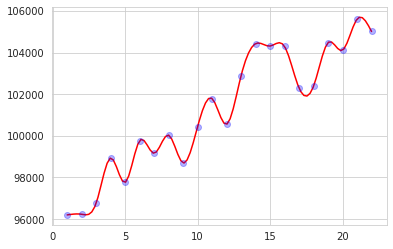

In [ ]:
# Dados de Fechamento da Bovespa
y = list(dados_bovespa['Fechamento'])
y.reverse()
for i in range(0,len(y)):
  y[i] = float(y[i].replace('.','').replace(',','.'))
x = np.linspace(1, len(y), len(y))
y = np.array(y)

# Fazendo o Spline Cúbico
segs = spline_cubica(x,y)
x_pred = np.linspace(1,len(y),100)
y_pred = get_y_spline_cubica(segs,x_pred)

plt.plot(x_pred,y_pred, 'r')
plt.plot(x,y, 'bo', alpha=0.3)

Como podemos ver, a reta formada passa por todos os pontos e é suave, dando a impressão de ser uma única função contínua devido ás condições impostas desde sua criação.

# **Conclusões**

Neste relatório revisitamos alguns dos métodos que foram vistos em sala de aula e nos aprofundamos no método de interpolação utilizando Splines lineares e cúbicos.